# Multivariable Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/dataMulti.xlsx", sheet_name='data').dropna(axis=0)
X, y = data.iloc[:, :3], data['Y']
data_train = pd.read_excel("./data/dataMulti.xlsx", sheet_name='dataTrain').dropna(axis=0)
X_train, y_train = data_train.iloc[:, :3], data_train['Y']
data_test = pd.read_excel("./data/dataMulti.xlsx", sheet_name='dataTest').dropna(axis=0)
X_test, y_test = data_test.iloc[:, :3], data_test['Y']
data.head()

,X1,X2,X3,Y
0,4732,18.5,70,9.0
1,4615,14.0,70,10.0
2,4376,15.0,70,10.0
3,4382,13.5,70,11.0
4,3940,13.2,76,13.0


The DataFrame data has three predictor variables (X1, X2, X3) and one response (Y). It has been split into training and test sets: dataTrain and dataTest.

In [3]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_train_poly = pd.DataFrame(x_train_poly, columns=poly.get_feature_names_out())
x_train_poly = x_train_poly[["1", "X1", "X3", "X1^2"]]
x_train_poly.head()

,1,X1,X3,X1^2
0,1.0,4732.0,70.0,22391824.0
1,1.0,4615.0,70.0,21298225.0
2,1.0,4382.0,70.0,19201924.0
3,1.0,4055.0,76.0,16443025.0
4,1.0,3870.0,76.0,14976900.0


In [4]:
regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)

LinearRegression()

In [5]:
x_test_poly = poly.transform(X_test)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly.get_feature_names_out())
x_test_poly = x_test_poly[["1", "X1", "X3", "X1^2"]]

y_pred = regressor.predict(x_test_poly)
print("R^2:", regressor.score(x_test_poly, y_test))

R^2: 0.8582809162339065


Compare actual and predicted response.

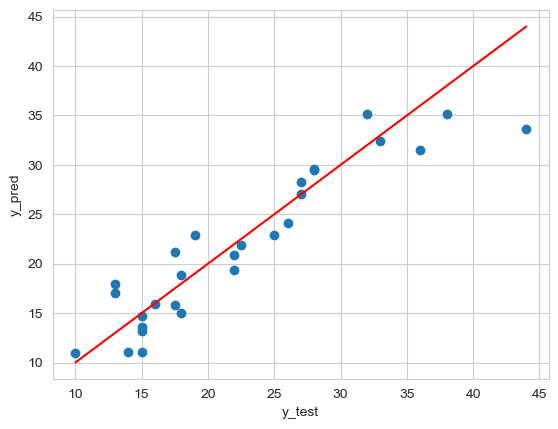

In [6]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()